In [1]:
import pandas as pd
import numpy as np
import itertools
import warnings
import statsmodels.api as sm
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")  # avoid warnings in output


In [2]:
# For example, using Yahoo Finance via yfinance
import yfinance as yf

data = yf.download("AAPL", start="2020-01-01", end="2023-01-01")
ts = data['Close']  # Use closing price
ts = ts.asfreq('B')  # Business days
ts = ts.fillna(method='ffill')  # Fill missing values


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))


In [4]:
best_aic = np.inf
best_pdq = None
results = []

for param in pdq:
    try:
        model = sm.tsa.ARIMA(ts, order=param)
        result = model.fit()
        results.append((param, result.aic))

        if result.aic < best_aic:
            best_aic = result.aic
            best_pdq = param

    except Exception as e:
        continue

print(f"Best ARIMA{best_pdq} AIC:{best_aic}")


Best ARIMA(0, 1, 1) AIC:3762.10498271102


In [5]:
best_model = sm.tsa.ARIMA(ts, order=best_pdq)
best_result = best_model.fit()
print(best_result.summary())


                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                  782
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1879.052
Date:                Fri, 23 May 2025   AIC                           3762.105
Time:                        06:52:51   BIC                           3771.426
Sample:                    01-02-2020   HQIC                          3765.690
                         - 12-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0707      0.030     -2.350      0.019      -0.130      -0.012
sigma2         7.1996      0.278     25.930      0.000       6.655       7.744
Ljung-Box (L1) (Q):                   0.00   Jarque-

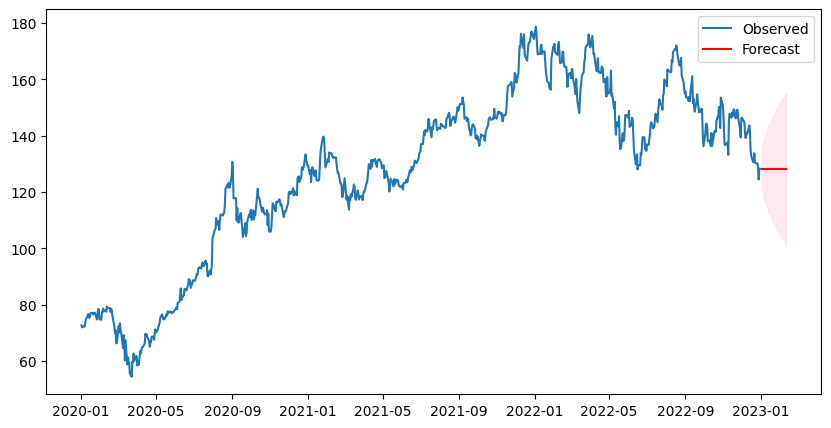

In [6]:
forecast = best_result.get_forecast(steps=30)
pred_ci = forecast.conf_int()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(ts, label='Observed')
plt.plot(forecast.predicted_mean, label='Forecast', color='r')
plt.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.show()
